In [2]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.regularizers import L2
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

In [3]:
# Pre Processing

data = pd.read_csv('./dataset/churn.csv') # Read from CSV File

data = data.drop(columns=['customer_id', 'country', 'gender']) # Drop unuseds columns

X = data.drop(columns=['churn'])
y = data['churn']

# Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting Dataset to Temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=22)

print('Length of X Train : ',len(X_train))
print('Length of X Temp : ', len(X_temp))

# Splitting Dataset to Test & Validation
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=32)


Length of X Train :  6000
Length of X Temp :  4000


In [14]:
# Modelling

# Single Perceptron Layer (SLP)
# model = Sequential([
#   Dense(units=1, activation='sigmoid')
# ])

# Multiple Perceptron Layer (MLP)
model = Sequential([
  Dense(units=128, activation='relu'),
  Dropout(0.5),
  Dense(units=64, activation='relu', kernel_regularizer=L2(0.005)),
  Dropout(0.5),
  Dense(units=32, activation='relu', kernel_regularizer=L2(0.005)),
  Dense(units=1, activation='sigmoid')
])

# Dropout -> Teknik dalam Neural Network untuk mencegah overfitting dengan cara secara random memilih unit neuron dalam layer menjadi 0, sehingga wajib menggunakan layer lainnya 
#  When a neuron is dropped out, its output is set to zero. This means that the neuron does not contribute to the calculation of the output of the layer.

# Kernel Regularizer -> Ini juga teknik untuk mencegah overfitting, L2 regularizers penalize the squared value of the kernel weights. 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# Optimizer -> algoritma untuk meng update weight selama training
# Adam optimizer is a good choice for most classification problems.

# SGD: Stochastic gradient descent is a simple but effective optimizer. It is often used as a baseline for comparison with other optimizers
# RMSprop: RMSprop is a more advanced optimizer that is often used for deep learning models. It is more efficient than SGD and can achieve better results.
# Adagrad: Adagrad is an optimizer that adapts the learning rate to each parameter. This can help to prevent the model from getting stuck in local minima.
# Adam: Adam is a newer optimizer that combines the advantages of SGD, RMSprop, and Adagrad. It is often the best choice for deep learning models.

# Loss function -> adalah sebuah function untuk mencari loss / error dari predicted function
# binary crossentropy loss function is a good choice for binary classification problems.
# Mean squared error: Mean squared error is a simple loss function that measures the average squared difference between the model's predictions and the ground truth labels. It is often used for regression problems.
# Hinge loss
# Huber loss

# Metrics -> metrics untuk meng-evaluasi performance model.

history = model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))
print(history.history)

188/188 [==============================] - 1s 2ms/step - loss: 0.8767 - accuracy: 0.7948 - acc: 0.7948 - val_loss: 0.6458 - val_accuracy: 0.8102 - val_acc: 0.8102
{'loss': [0.8767473697662354], 'accuracy': [0.7948333621025085], 'acc': [0.7948333621025085], 'val_loss': [0.645803689956665], 'val_accuracy': [0.8101999759674072], 'val_acc': [0.8101999759674072]}


In [5]:
# Make Predictions
y_pred = model.predict(X_test)

# Thresholds
y_pred_label = [1 if p >= 0.5 else 0 for p in y_pred]
print(f'Predictions Labels : {y_pred_label}')
print(f'Predictions: {y_pred}')

157/157 [==============================] - 0s 538us/step
Predictions Labels : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
# Evaluate the models
print(np.array(y_test))
y_pred = (y_pred > 0.5)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on Testing Set : {accuracy}')

print(f'Accuracy with sklearn : {accuracy_score(np.array(y_test), y_pred)}')

[0 1 0 ... 0 0 0]
157/157 [==============================] - 0s 668us/step - loss: 0.6749 - accuracy: 0.7966
Accuracy on Testing Set : 0.7965999841690063
Accuracy with sklearn : 0.7966


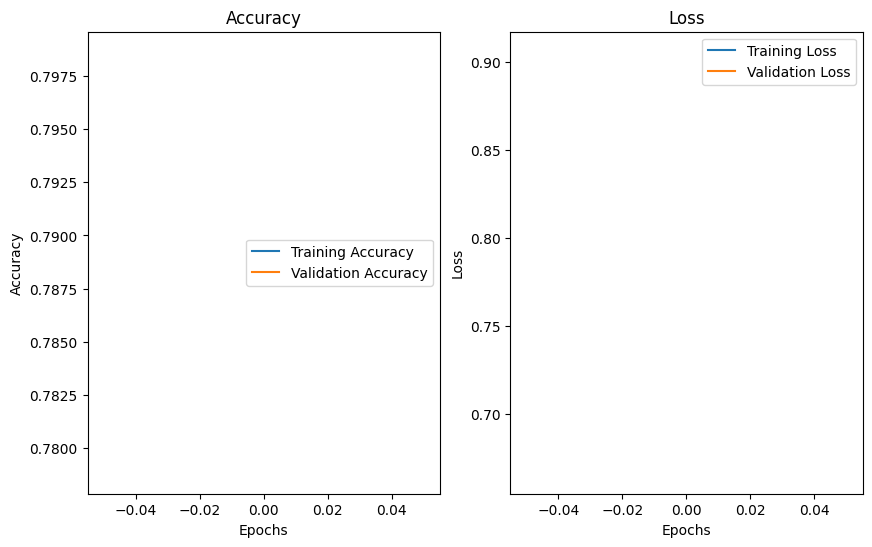

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label ='Training Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()